# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [2]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [3]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)#A с нулевой диагональю(D-A)

D = np.diag(diag_1d)#Действительно D

invD = np.diag(1./diag_1d)#D^-1
BB = invD @ B #B=D^-1(D-A)
c = invD @ b 

In [4]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [5]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [6]:
n_iter = 50
n_i = 1
x0 = np.ones(n)

x = x0
for _ in range(n_iter):
    x = BB @ x + c
x

array([ 0.03919429,  0.03780037,  0.04283232,  0.02365951,  0.05745031,
       -0.00030244, -0.00577279,  0.03177549, -0.00422849,  0.05284648])

In [7]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.73472348e-17,  0.00000000e+00,
       -2.77555756e-17,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [17]:
import matplotlib.pyplot as plt

def Jacobi(A, b, n_iter):
    n = np.shape(A)[0]
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)#A с нулевой диагональю(D-A)

    D = np.diag(diag_1d)#Действительно D
    invD = np.diag(1. / diag_1d)#D^-1
    BB = invD @ B #B=D^-1(D-A)
    assert (np.linalg.norm(BB)<1), 'matrix is non strongly diagonally dominant' #Проверяем норму B
    c = invD @ b #rhs
    x = np.ones(n)
    for _ in range(n_iter):
        x = BB @ x + c
    return x

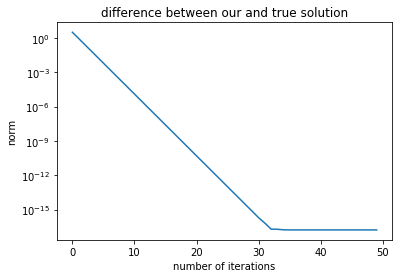

In [30]:
#Let's check the convergence for a strongly diagonally dominant matrix
#(Functon also checks the value of the norm of the matrix B and returns assert if ||B||>1)
A0 = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b0 = rndm.uniform(size=n)

ind = np.arange(50)
my = []
x_true = np.linalg.solve(A0, b0)
for i in ind:
    my.append(np.linalg.norm(Jacobi(A0, b0, i) - x_true))#Проверяем, сходится ли наше решение к верному и как сходится
plt.plot(ind, my)
plt.title('difference between our and true solution')
plt.xlabel('number of iterations')
plt.ylabel('norm')
plt.yscale('log')#Логарифмическая шкала помогает понять, что сходится у нас все хорошо, а в районе машинного эпсилона начинается ерунда по понятным причинам

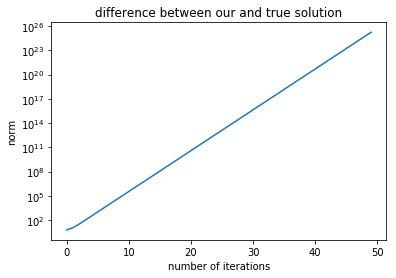

In [31]:
#Let's check how Jacobi method will solve a non strongly diagonally dominant matrix
A0 = rndm.uniform(size=(n, n)) + np.diagflat([1]*n)
b0 = rndm.uniform(size=n)

def Jacobi2(A, b, n_iter):
    n = np.shape(A)[0]
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)#A с нулевой диагональю(D-A)

    D = np.diag(diag_1d)#Действительно D
    invD = np.diag(1. / diag_1d)#D^-1
    BB = invD @ B #B=D^-1(D-A)
    c = invD @ b #rhs
    x = np.ones(n)
    for _ in range(n_iter):
        x = BB @ x + c
    return x
ind = np.arange(50)
my = []
x_true = np.linalg.solve(A0, b0)
for i in ind:
    my.append(np.linalg.norm(Jacobi2(A0, b0, i)-x_true))
plt.plot(ind, my)
plt.title('difference between our and true solution')
plt.xlabel('number of iterations')
plt.ylabel('norm')
plt.yscale('log')

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [22]:
# ... ENTER YOUR CODE HERE ...
def Seidel(A, b, n_it):
    n = np.shape(A)[0]
    x = np.ones(n)
    for _ in range(n_it):
        for i in range(n):
            x[i] = (sum((A[i] != A[i][i]) * A[i] * x) * (-1) + b[i]) / A[i][i]
    return x

Let's repeat our two tests: we expect the same result as Jacobi showed

0.2829549925842387


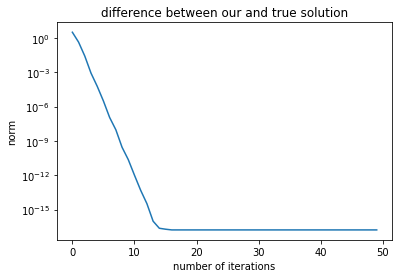

In [29]:
#1.Diagonal
A0 = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b0 = rndm.uniform(size=n)


ind = np.arange(50)
my = []
x_true = np.linalg.solve(A0, b0)

for i in ind:
    my.append(np.linalg.norm(Seidel(A0, b0, i)-x_true))
    
plt.plot(ind, my)
n = np.shape(A)[0]
#Let's check the norm of iteration matrix I = (L + D)^-1 * U
LD = [[A0[i][j] if i <= j else 0 for i in range(n)] for j in range(n)] 
U = A0 - LD
LD = np.linalg.inv(LD)
plt.title('difference between our and true solution')
plt.xlabel('number of iterations')
plt.ylabel('norm')
plt.yscale('log')
print(np.linalg.norm(LD @ U))

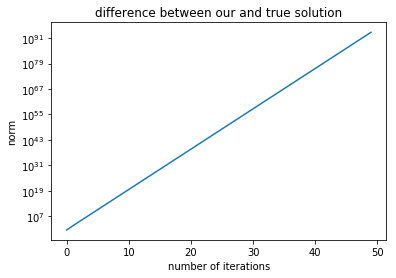

In [35]:
#absolutely random matrix
A0 = rndm.uniform(size=(n, n))
b0 = rndm.uniform(size=n)

my = []
x_true = np.linalg.solve(A0, b0)

for i in ind:
    my.append(np.linalg.norm(Seidel(A0, b0, i)-x_true))
    
plt.plot(ind, my)
n = np.shape(A0)[0]

plt.title('difference between our and true solution')
plt.xlabel('number of iterations')
plt.ylabel('norm')
plt.yscale('log')
#Все расходится

As we can see, our expextations are were met. Now let's check one more moment: Jacobi method has to be better for ~diagonal matrix and Seidel for ~triangular

In [47]:
Ad = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
At = rndm.uniform(size=(n, n)) + [[15 if i <= j else 0 for i in range(n)] for j in range(n)] 

xd = np.linalg.solve(Ad, b0)
xt = np.linalg.solve(At, b0)

print(np.linalg.norm(Jacobi2(Ad, b0, 10) - xd), np.linalg.norm(Seidel(Ad, b0, 10) - xd))
print(np.linalg.norm(Jacobi2(At, b0, 10) - xt), np.linalg.norm(Seidel(At, b0, 10) - xt))

7.989137097083998e-06 2.933360805352404e-13
38447.06892820984 4.698219090689264e-11


As we can see, for diaronal matrix Seidel works better than Jacobi, and works pretty good for triangular matrix(unlike the Jacobi method, which doesn't have a limit). I toke 10 as number of iterations, because plot shows that after ~15 iterations deviation is equal to the machine eps and our comparisons wouldn't have any sense.

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [68]:
# ... ENTER YOUR CODE HERE ...
def min_res(A, b, n_it):
    x = np.ones(np.shape(A)[0])
    for _ in range(n_it):
        r = A @ x - b
        if np.linalg.norm(A @ r) < 1e-45:
            return x
        tau = np.dot(r, A @ r) / np.linalg.norm(A @ r)**2
        x = x - tau * r 
    return x

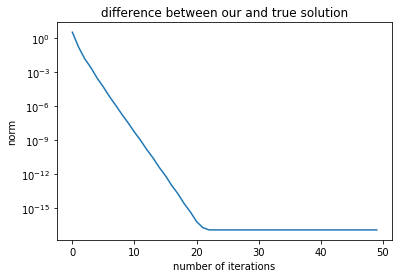

In [67]:
mr_sol = []
x_true = np.linalg.solve(Ad, b0)
for i in ind:
    mr_sol.append(np.linalg.norm(min_res(Ad, b0, i)- x_true)) 
plt.plot(ind, mr_sol,'-')

plt.title('difference between our and true solution')
plt.xlabel('number of iterations')
plt.ylabel('norm')
plt.yscale('log')